In [3]:
import os
from pathlib import Path
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr

from scipy.integrate import trapezoid

In [4]:
parent = os.path.join(Path(os.getcwd()).parent)

print(parent)

sys.path.append(parent)

c:\Users\bruij_kn\OneDrive - Stichting Deltares\Documents\GitHub\thermo-morphological-model\test


In [5]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [7]:
folder_path = Path("c:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/sa_base")

In [8]:
output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000840', '0000

In [9]:
comp_times = np.loadtxt('sa_base_computation-times.txt')
timestep_ids = np.loadtxt('sa_base_timestep-ids.txt')
timestamps = pd.to_datetime(np.loadtxt('sa_base_timestamps.txt', ))

xbeach_times = np.loadtxt(os.path.join(folder_path, os.path.join(folder_path, Path("xbeach_times.txt"))))[::12]

In [10]:
gradient = np.gradient(comp_times, np.float32(timestamps))

avg_gradient = np.mean(gradient)

xbeach_activation_gradient = (gradient > avg_gradient)

date_pairs = []

for i in range(len(xbeach_activation_gradient)):
    
    if xbeach_activation_gradient[i] == 1 and xbeach_activation_gradient[i-1] == 0:
        date1 = timestamps[i]
        
        for j in range(len(xbeach_activation_gradient[i:])):
            if xbeach_activation_gradient[i:][j+1] == 0:
                
                date2 = timestamps[i:][j]
                                
                date_pairs.append((date1, date2))
                
                break
            
    
print(date_pairs)

[(Timestamp('2017-05-28 00:00:00'), Timestamp('2017-05-28 12:00:00')), (Timestamp('2017-06-18 00:00:00'), Timestamp('2017-06-18 12:00:00')), (Timestamp('2017-06-24 12:00:00'), Timestamp('2017-06-26 12:00:00')), (Timestamp('2017-07-02 00:00:00'), Timestamp('2017-07-02 12:00:00')), (Timestamp('2017-07-09 00:00:00'), Timestamp('2017-07-09 12:00:00')), (Timestamp('2017-07-16 00:00:00'), Timestamp('2017-07-16 12:00:00')), (Timestamp('2017-07-21 00:00:00'), Timestamp('2017-07-26 12:00:00')), (Timestamp('2017-07-30 00:00:00'), Timestamp('2017-07-30 12:00:00')), (Timestamp('2017-08-02 12:00:00'), Timestamp('2017-08-03 00:00:00')), (Timestamp('2017-08-06 00:00:00'), Timestamp('2017-08-06 12:00:00')), (Timestamp('2017-08-10 00:00:00'), Timestamp('2017-08-13 12:00:00')), (Timestamp('2017-08-20 00:00:00'), Timestamp('2017-08-20 12:00:00')), (Timestamp('2017-08-27 00:00:00'), Timestamp('2017-08-27 12:00:00')), (Timestamp('2017-09-03 00:00:00'), Timestamp('2017-09-03 12:00:00')), (Timestamp('2017-09

In [11]:
xbeach_times = np.loadtxt(os.path.join(folder_path, Path("xbeach_times.txt")))
all_timestamps = pd.to_datetime(np.loadtxt(os.path.join(folder_path, Path("timestamps.txt"))))

date_pairs = []

for i in range(len(xbeach_times)):
    
    if xbeach_times[i] >= 1 and xbeach_times[i-1] == 0:
        date1 = all_timestamps[i]
        
        for j in range(len(xbeach_times[i:])-1):
            if xbeach_times[i:][j] >= 1 and xbeach_times[i:][j+1] == 0:

                date2 = all_timestamps[i:][j]
                
                if date2 - date1 > pd.Timedelta('1h'):
                
                    date_pairs.append((date1, date2))
                
                break
                    
            
    
print(date_pairs)

[(Timestamp('2017-06-25 11:00:00'), Timestamp('2017-06-25 13:00:00')), (Timestamp('2017-06-25 17:00:00'), Timestamp('2017-06-26 01:00:00')), (Timestamp('2017-07-21 04:00:00'), Timestamp('2017-07-21 22:00:00')), (Timestamp('2017-07-22 19:00:00'), Timestamp('2017-07-24 00:00:00')), (Timestamp('2017-07-24 19:00:00'), Timestamp('2017-07-25 17:00:00')), (Timestamp('2017-07-25 19:00:00'), Timestamp('2017-07-26 00:00:00')), (Timestamp('2017-08-02 12:00:00'), Timestamp('2017-08-02 22:00:00')), (Timestamp('2017-08-10 08:00:00'), Timestamp('2017-08-10 14:00:00')), (Timestamp('2017-08-10 18:00:00'), Timestamp('2017-08-11 02:00:00')), (Timestamp('2017-08-11 10:00:00'), Timestamp('2017-08-11 14:00:00')), (Timestamp('2017-08-11 23:00:00'), Timestamp('2017-08-12 02:00:00')), (Timestamp('2017-09-29 12:00:00'), Timestamp('2017-09-30 21:00:00')), (Timestamp('2017-10-07 18:00:00'), Timestamp('2017-10-08 00:00:00')), (Timestamp('2017-11-03 06:00:00'), Timestamp('2017-11-03 18:00:00')), (Timestamp('2018-08

In [12]:
runid = "sa_base"
folder_path = Path(f"c:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/{runid}")

print(runid)

output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

sa_base
['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000840

In [13]:
# total_volume_in_upper_bluff = []
# timestamps = []

# i = 1

# # reference variables
# max_distance_from_top = 5  # m
# N = 10**5

# for output_id in output_ids:
    
#     fname = str(output_id + '.nc')
    
#     ds = xr.load_dataset(os.path.join(folder_path, fname))
    
#     xgr = ds.xgr.values
#     zgr = ds.zgr.values
#     timestamp = ds.timestamp.values
    
#     ds.close()
    
#     x_interp = np.linspace(xgr[0], xgr[-1], N)
#     z_interp = np.interp(x_interp, xgr, zgr)
        
#     z_mask_ = (z_interp > np.max(zgr) - max_distance_from_top)
        
#     V_from_top = trapezoid(z_mask_ * z_interp, x_interp)
#     V_from_threshold = trapezoid(z_mask_ * np.ones(z_interp.shape) * (np.max(zgr) - max_distance_from_top), x_interp)
    
#     V = V_from_top - V_from_threshold
    
#     total_volume_in_upper_bluff.append(V)
#     timestamps.append(timestamp)
    
#     print(f'finished {i}/{len(output_ids)}')
    
#     i += 1
    
# sort_mask = np.argsort(np.int32(output_ids))

# total_volume_in_upper_bluff = np.array(total_volume_in_upper_bluff)[sort_mask]
# timestamps = np.array(timestamps)[sort_mask]

# np.savetxt(f'{runid}_total_volume_in_upper_bluff.txt', total_volume_in_upper_bluff)

In [14]:
runid = "sa_lvl2_9"
folder_path = Path(f"c:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/{runid}")

print(runid)

output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

sa_lvl2_9
['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '00000008

In [15]:
# total_volume_in_upper_bluff = []
# timestamps = []

# i = 1

# # reference variables
# max_distance_from_top = 5  # m
# N = 10**5

# for output_id in output_ids:
    
#     fname = str(output_id + '.nc')
    
#     ds = xr.load_dataset(os.path.join(folder_path, fname))
    
#     xgr = ds.xgr.values
#     zgr = ds.zgr.values
#     timestamp = ds.timestamp.values
    
#     ds.close()
    
#     x_interp = np.linspace(xgr[0], xgr[-1], N)
#     z_interp = np.interp(x_interp, xgr, zgr)
        
#     z_mask_ = (z_interp > np.max(zgr) - max_distance_from_top)
        
#     V_from_top = trapezoid(z_mask_ * z_interp, x_interp)
#     V_from_threshold = trapezoid(z_mask_ * np.ones(z_interp.shape) * (np.max(zgr) - max_distance_from_top), x_interp)
    
#     V = V_from_top - V_from_threshold
    
#     total_volume_in_upper_bluff.append(V)
#     timestamps.append(timestamp)
    
#     print(f'finished {i}/{len(output_ids)}')
    
#     i += 1
    
# sort_mask = np.argsort(np.int32(output_ids))

# total_volume_in_upper_bluff = np.array(total_volume_in_upper_bluff)[sort_mask]
# timestamps = np.array(timestamps)[sort_mask]

# np.savetxt(f'{runid}_total_volume_in_upper_bluff.txt', total_volume_in_upper_bluff)

In [16]:
runid = "sa_lvl2_10"
folder_path = Path(f"c:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/{runid}")

print(runid)

output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

output_ids = [
    str(item)[:-3] for item in os.listdir(folder_path) if ('.nc' in str(item) and '0' in str(item))
]

print(output_ids)

sa_lvl2_10
['0000000000', '0000000012', '0000000024', '0000000036', '0000000048', '0000000060', '0000000072', '0000000084', '0000000096', '0000000108', '0000000120', '0000000132', '0000000144', '0000000156', '0000000168', '0000000180', '0000000192', '0000000204', '0000000216', '0000000228', '0000000240', '0000000252', '0000000264', '0000000276', '0000000288', '0000000300', '0000000312', '0000000324', '0000000336', '0000000348', '0000000360', '0000000372', '0000000384', '0000000396', '0000000408', '0000000420', '0000000432', '0000000444', '0000000456', '0000000468', '0000000480', '0000000492', '0000000504', '0000000516', '0000000528', '0000000540', '0000000552', '0000000564', '0000000576', '0000000588', '0000000600', '0000000612', '0000000624', '0000000636', '0000000648', '0000000660', '0000000672', '0000000684', '0000000696', '0000000708', '0000000720', '0000000732', '0000000744', '0000000756', '0000000768', '0000000780', '0000000792', '0000000804', '0000000816', '0000000828', '0000000

In [17]:
# total_volume_in_upper_bluff = []
# timestamps = []

# i = 1

# # reference variables
# max_distance_from_top = 5  # m
# N = 10**5

# for output_id in output_ids:
    
#     fname = str(output_id + '.nc')
    
#     ds = xr.load_dataset(os.path.join(folder_path, fname))
    
#     xgr = ds.xgr.values
#     zgr = ds.zgr.values
#     timestamp = ds.timestamp.values
    
#     ds.close()
    
#     x_interp = np.linspace(xgr[0], xgr[-1], N)
#     z_interp = np.interp(x_interp, xgr, zgr)
        
#     z_mask_ = (z_interp > np.max(zgr) - max_distance_from_top)
        
#     V_from_top = trapezoid(z_mask_ * z_interp, x_interp)
#     V_from_threshold = trapezoid(z_mask_ * np.ones(z_interp.shape) * (np.max(zgr) - max_distance_from_top), x_interp)
    
#     V = V_from_top - V_from_threshold
    
#     total_volume_in_upper_bluff.append(V)
#     timestamps.append(timestamp)
    
#     print(f'finished {i}/{len(output_ids)}')
    
#     i += 1
    
# sort_mask = np.argsort(np.int32(output_ids))

# total_volume_in_upper_bluff = np.array(total_volume_in_upper_bluff)[sort_mask]
# timestamps = np.array(timestamps)[sort_mask]

# np.savetxt(f'{runid}_total_volume_in_upper_bluff.txt', total_volume_in_upper_bluff)

In [18]:
comp_times = np.loadtxt('sa_base_computation-times.txt')
total_volume_in_upper_bluff_base = np.loadtxt('sa_base_total_volume_in_upper_bluff.txt')
total_volume_in_upper_bluff_lvl2_15 = np.loadtxt('sa_lvl2_9_total_volume_in_upper_bluff.txt')
total_volume_in_upper_bluff_lvl2_16 = np.loadtxt('sa_lvl2_10_total_volume_in_upper_bluff.txt')
timestep_ids = np.loadtxt('sa_base_timestep-ids.txt')
timestamps = pd.to_datetime(np.loadtxt("sa_base_timestamps.txt"))

In [19]:
volume_start = total_volume_in_upper_bluff_base[0]

volume_loss_base = volume_start - total_volume_in_upper_bluff_base
volume_loss_lvl2_15 = volume_start - total_volume_in_upper_bluff_lvl2_15
volume_loss_lvl2_16 = volume_start - total_volume_in_upper_bluff_lvl2_16

print(volume_loss_base)
print(volume_loss_lvl2_16)

[ 0.          0.          0.         ... 19.68266347 19.68266347
 19.68266347]
[ 0.          0.          0.         ... 21.73119617 21.73119617
 21.73119617]


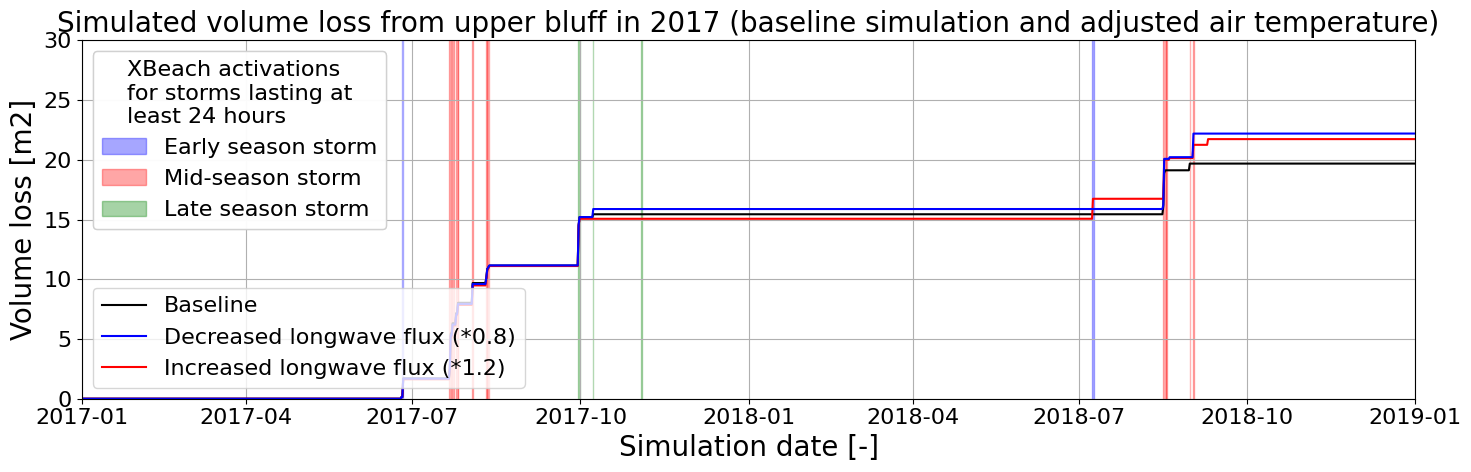

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))

l1, = ax.plot(timestamps, volume_loss_base, color='k')
l2, = ax.plot(timestamps, volume_loss_lvl2_16, color='r')
l3, = ax.plot(timestamps, volume_loss_lvl2_15, color='b')

for date1, date2 in date_pairs:
    if date1 > pd.to_datetime("2017-09-01") and date1 < pd.to_datetime("2017-12-01"):
        ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='g')
    elif date1 < pd.to_datetime("2017-07-01"):
        ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='b')
    else:
        ax.fill_between([date1, date2], -2000, 20000, alpha=0.3, color='r')

p2 = ax.fill_between([0, 0], 0, 0, alpha=0.3, label='Early season storm', color='b')
p1 = ax.fill_between([0, 0], 0, 0, alpha=0.3, label='Mid-season storm', color='r')
p3 = ax.fill_between([0, 0], 0, 0, alpha=0.3, label='Late season storm', color='g')

ax.fill_between([pd.to_datetime("2018-07-08"), pd.to_datetime("2018-07-09")], -2000, 20000, alpha=0.3, color='b')

ax.set_xlabel('Simulation date [-]')
ax.set_ylabel('Volume loss [m2]')

ax.set_title("Simulated volume loss from upper bluff in 2017 (baseline simulation and adjusted air temperature)")

ax.set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2019-01-01")))
ax.set_ylim((0, 30))

ax.grid()

# leg1 = ax.legend([l1, l2, l3], ['Baseline', 'Increased temperature (+2 degrees)', 'Decreased temperature (-2 degrees)'], loc='lower left')
leg1 = ax.legend([l1, l3, l2], ['Baseline', 'Decreased longwave flux (*0.8)', 'Increased longwave flux (*1.2)'], loc='lower left')
leg2 = ax.legend([p2, p1, p3], [p.get_label() for p in [p2, p1, p3]], title="XBeach activations\nfor storms lasting at\nleast 24 hours")

ax.add_artist(leg1)
ax.add_artist(leg2)

fig.tight_layout()

figname = 'volume_loss_longwave-effect.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

In [24]:
df = pd.read_csv(Path(r"C:\Users\bruij_kn\OneDrive - Stichting Deltares\Documents\GitHub\thermo-morphological-model\database\ts_datasets\era5.csv"), parse_dates=['time'])

df = df[(df.time > pd.to_datetime("2017-01-01")) & (df.time < pd.to_datetime("2019-01-01"))]

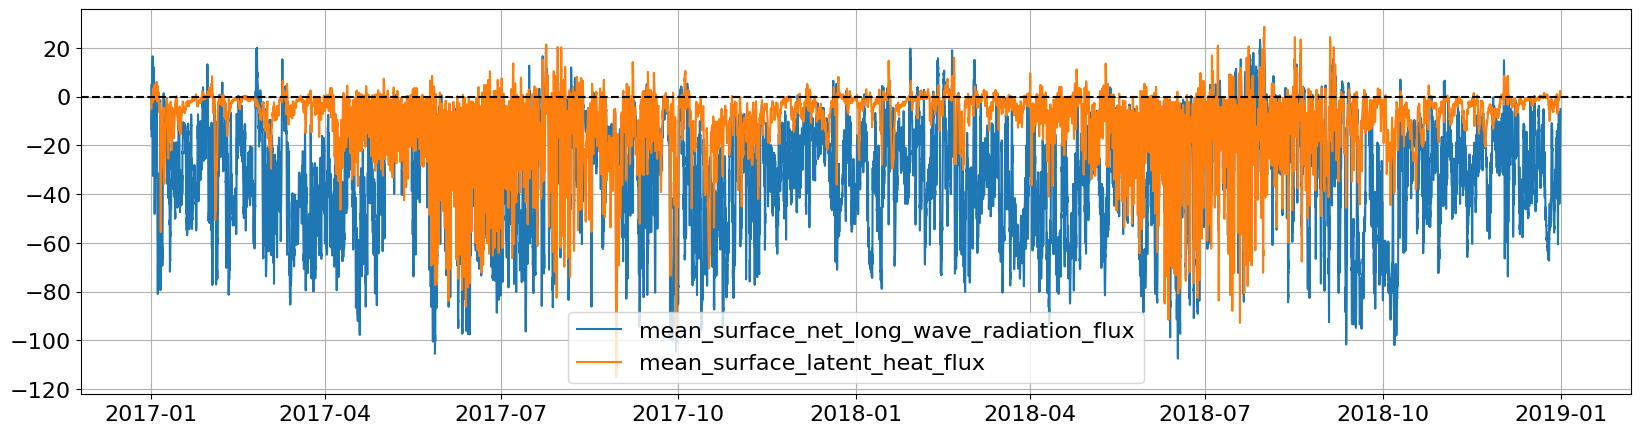

In [30]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(df.time.values, df.mean_surface_net_long_wave_radiation_flux, label="mean_surface_net_long_wave_radiation_flux")
ax.plot(df.time.values, df.mean_surface_latent_heat_flux, label="mean_surface_latent_heat_flux")

ax.axhline(0, color='k', ls='--')

ax.grid()

ax.legend()